In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [2]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [3]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [4]:
name = ["英里/加仑","气缸数量","排量","总马力","驱动轴比","重量"
        ,"1/4英里所用时间","引擎","变速器","前进档数","化油器数量","用油是否高效"
        ,"汽车","汽车名称"]
[*zip(df.columns, name)]

[('mpg', '英里/加仑'),
 ('cyl', '气缸数量'),
 ('disp', '排量'),
 ('hp', '总马力'),
 ('drat', '驱动轴比'),
 ('wt', '重量'),
 ('qsec', '1/4英里所用时间'),
 ('vs', '引擎'),
 ('am', '变速器'),
 ('gear', '前进档数'),
 ('carb', '化油器数量'),
 ('fast', '用油是否高效'),
 ('cars', '汽车'),
 ('carname', '汽车名称')]

In [6]:
#其中cars和carname是一模一样的数据

(df["cars"] != df["carname"]).sum()

0

In [8]:
# 相关性
coef = df.corr()
coef

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast
mpg,1.000000,-0.858539,-0.867536,-0.787309,0.680312,-0.883453,0.420317,0.669260,0.593153,0.487226,-0.553703,0.730748
cyl,-0.858539,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,-0.695182
disp,-0.867536,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,-0.732073
hp,-0.787309,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,-0.751422
drat,0.680312,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790,0.400430
wt,-0.883453,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606,-0.611265
qsec,0.420317,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249,0.488649
vs,0.669260,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607,0.594588
am,0.593153,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534,0.283129
gear,0.487226,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073,0.266919


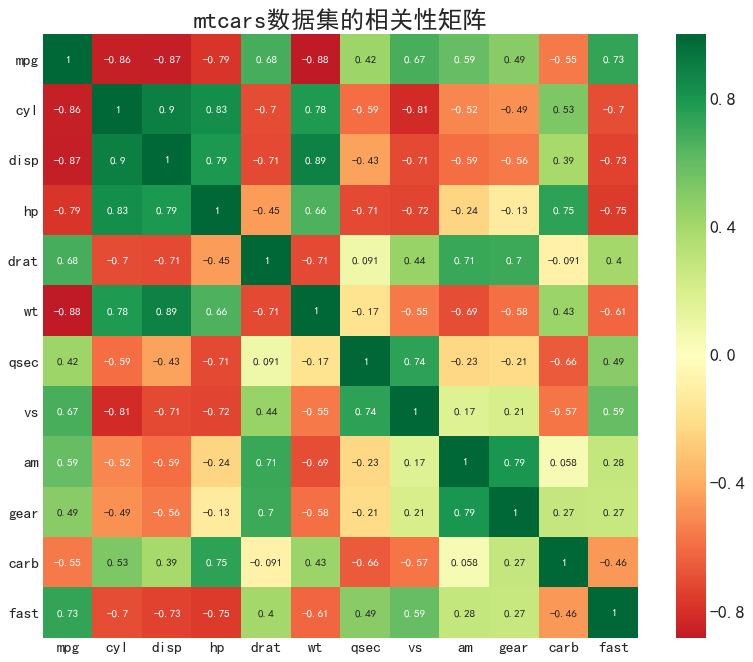

In [22]:
# 热力图
#确保正常显示中文+负号
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(df.corr(),
#             xticklabels=coef.columns, 
#             yticklabels=coef.columns, 
            cmap='RdYlGn',
            center=0,
            annot=True
           )

#装饰图像
plt.title('mtcars数据集的相关性矩阵', fontsize=22)
plt.xticks(fontsize=14, #字体大小
#            rotation=45, #字体是否进行旋转
#            horizontalalignment='right', #刻度的相对位置
           horizontalalignment='center'
          )
plt.yticks(fontsize=14, rotation=0)
plt.show()


<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 09/50 成对分析图

In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [25]:
# 鸢尾花数据集
df = sns.load_dataset('iris')

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
df.shape

(150, 5)

In [28]:
name = ["花萼长","花萼宽","花瓣长","花瓣宽","species"]
[*zip(df.columns, name)]

[('sepal_length', '花萼长'),
 ('sepal_width', '花萼宽'),
 ('petal_length', '花瓣长'),
 ('petal_width', '花瓣宽'),
 ('species', 'species')]

In [30]:
df.columns = name
df.head()

,花萼长,花萼宽,花瓣长,花瓣宽,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 800x640 with 0 Axes>

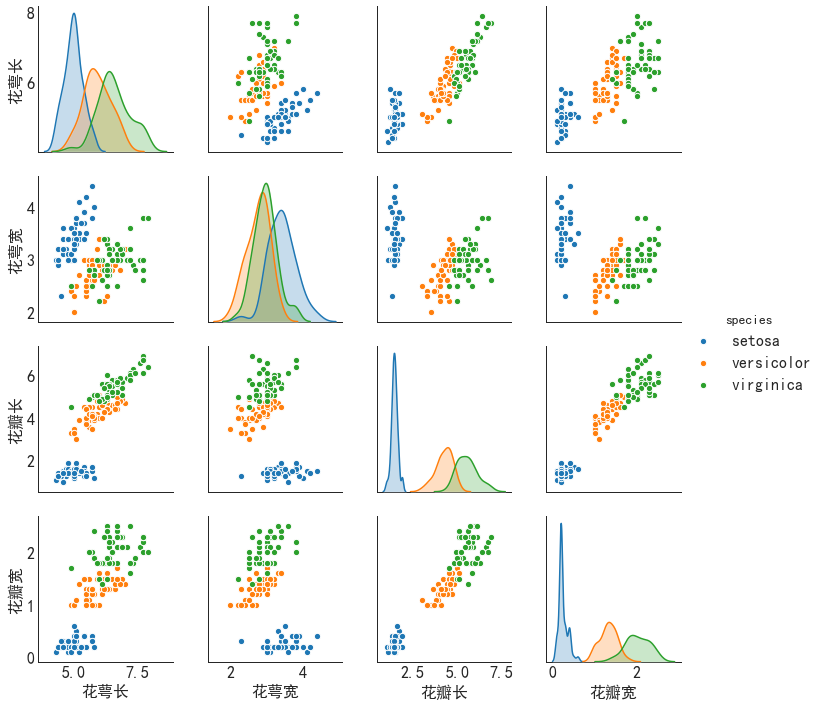

In [31]:
# 绘图 sns.pairplot() 
plt.rcParams['font.sans-serif']=['Simhei'] #中文能够显示
plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(df,
             kind='scatter', 
             hue='species', 
             plot_kws=dict(s=40, edgecolor="white", linewidth=1),
            )

<Figure size 800x640 with 0 Axes>

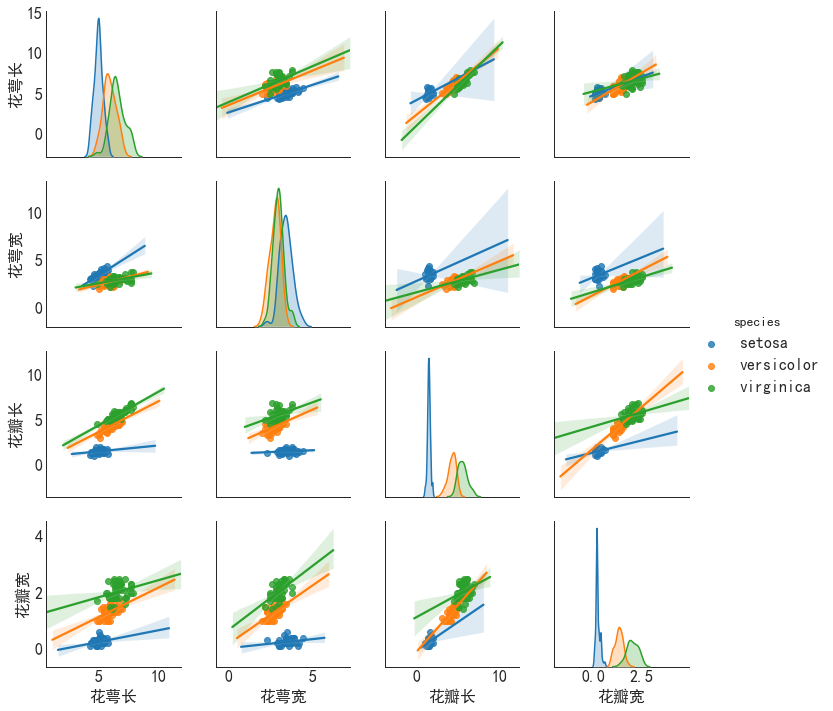

In [34]:
plt.rcParams['font.sans-serif']=['Simhei'] #中文能够显示
plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(df,
             kind='reg', 
             hue='species', 
#              plot_kws=dict(s=40, edgecolor="white", linewidth=1),
            )